# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [28]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [29]:
# Your work here.
# We import the necessary packages.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from scipy import stats
%matplotlib inline

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


Question 1 
Is the distribution of body temperatures normal? 

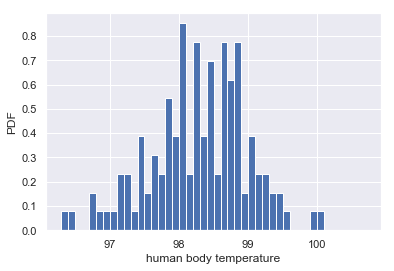

In [30]:
# We check to see if the distribution is normal.
mybins = np.arange(96.3, 100.8, 0.1)
plt.hist(df['temperature'], density=True, bins=mybins)
plt.xlabel('human body temperature')
plt.ylabel('PDF')
plt.show()

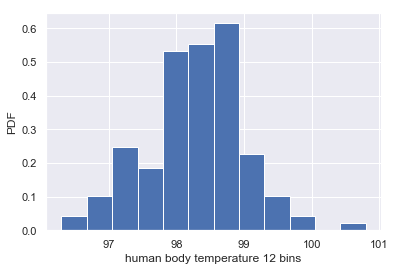

In [31]:
plt.hist(df['temperature'], density=True, bins=12)
plt.xlabel('human body temperature 12 bins')
plt.ylabel('PDF')
plt.show()

In [32]:
# We define ecdf function for one dimensional array data
def ecdf(data):
    """Calculates the ECDF of data"""
    # number of data points
    n = len(data)
    
    # we sort data
    x = np.sort(data)
    
    # We space y values equally:
    y = np.arange(1, n+1) / n
    
    return x, y

130


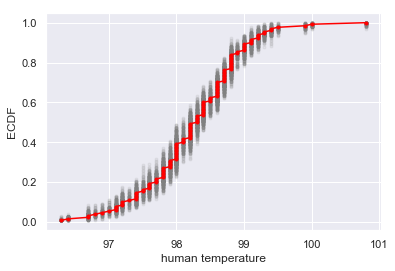

In [33]:
# We can compare ecdf of human temperature data and 
# bootstrap sample of the data.
temp = df['temperature']
print(len(temp))
for _ in range(100):
    
    # generating a sample
    temp_sample = np.random.choice(temp, len(temp))
    
    # ecdf of sample
    x, y = ecdf(temp_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)
    
# calculate and plot the temperature data
x, y = ecdf(temp) 
_ = plt.plot(x, y, marker='.', color='red')

#adjusting the plot
# plt.margin(0.02)
_ = plt.xlabel('human temperature')
_ = plt.ylabel('ECDF')

#Show
plt.show()


In [34]:
mean_body = np.mean(temp)
std_body = np.std(temp)
print('mean body temp is ', mean_body)
print('standard deviation of the data is ', std_body)

mean body temp is  98.24923076923075
standard deviation of the data is  0.730357778905038


Superimposing normal histogram with mean 
m = 98.25 

and standard deviation
std = 0.73 

over the data historgram

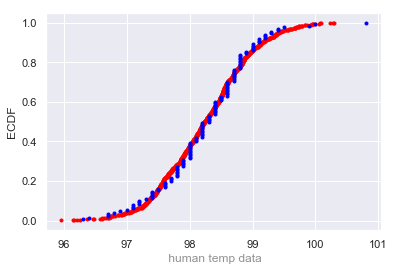

In [35]:
#
body_norm = np.random.normal(98.25, 0.73, size=1000)

x_theor, y_theor = ecdf(body_norm)
plt.plot(x_theor, y_theor, marker='.', linestyle='none', color='red')


x, y = ecdf(temp)
plt.plot(x, y, marker='.', linestyle='none', color='blue')
_ = plt.xlabel(' human temp data', alpha=0.5)
_ = plt.ylabel('ECDF')
plt.show()

On the graph above, we see an outlier temperature.
We can calculate the z-value of that temperature

In [11]:
# z statistics
tem_max = temp.max()
tem_min = temp.min()
z_max = (tem_max - mean_body)/std_body
print('z-value of max temp in array = ', z_max)
print('min temp observed = ', tem_min)
print('max temp observed = ', tem_max)

z-value of max temp in array =  3.4924927267748074
min temp observed =  96.3
max temp observed =  100.8


The z-value of 3.49 suggest that the human body normal temperature may not be normally distributed. The sample size is less than 300, and z-value over 3.0 suggests it might not be normally distributed.

We already calculated theoretical normal distribution. It is stored in variable y_theor, and the observed frequency is in y variable above. Also, the variable y_theor follows the same rule, and is in increments of 0.1 degree Fahrenheit.
We will use the distribution from the min observed temperature to the max observed temperature and use degrees of freedom from that discretization.

The number of degrees of freedom is (100.8 - 96.3)/.1 = 45

__Question 2__
Is the sample size large? Are the observations independent? 

Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 

According to "Statistics How To" website (https://www.statisticshowto.datasciencecentral.com/large-enough-sample-condition/), for a sample to be large, we need in each cell to have at least 5 observations in it to meet Expected count condition. We could have cells with less than 5 entries, but these have to be no more of 20% of the cells.

How about our data?

In [13]:
temp.value_counts()

98.0     11
98.2     10
98.8     10
98.6     10
98.4      9
98.7      8
97.8      7
99.0      5
97.4      5
98.3      5
97.9      5
97.6      4
98.5      3
97.1      3
98.1      3
97.2      3
99.2      3
97.7      3
99.1      3
97.5      2
98.9      2
99.4      2
99.3      2
96.7      2
96.8      1
96.9      1
99.9      1
97.0      1
100.0     1
97.3      1
100.8     1
99.5      1
96.3      1
96.4      1
Name: temperature, dtype: int64

It turns out this is not big enough sample. It does not have 5 or more observations for each value. The weaker condition, to have less than 5 in no more of 20% of the cells is not met either. 

The sample is small.

Question 3 
Is the true population mean really 98.6 degrees F? 
   
First, try a bootstrap hypothesis test. 

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 

In this situation, is it appropriate to use the  𝑡-test or z test statistics

Now try using the other test. How is the result be different? Why? 

Null hypothesis: true population mean is 98.6 degrees F.

We have one set of data and we can perform one sample test. 

Procedure:
First, we translate the temperature data to have the required mean of 98.6F. 

Then, we take large number of replicates of the translated sample and calculate its mean.

We calculate the probability to have the mean less than the original mean of the data set. 

Criteria:
If we encounter less than 5% of the data points are less than the observed data mean, then,
it is very unlikely to have mean temperature of 98.6F.

In [36]:

# we translate the temperature to match
t_mean = np.mean(temp)
trans_temp = temp - t_mean + 98.6

# generating replicates 10,000 replicates
# initializing array of replicates
temp_replicate = np.empty(10000)

# loop to generate replicates
for i in range(10000):
    temp_replicate = np.mean(np.random.choice(trans_temp, len(trans_temp)))

# calculating p-value:
p = np.sum(temp_replicate <= t_mean) / 10000

print('p = ', p)

p =  0.0


The reported p value of 0.0 shows that it is very unlikely to have mean body temperature of 98.6F.


Alternatively, we can conduct z-statistics test.

In [15]:
z_value = (mean_body - 98.6)/(std_body/np.sqrt(len(temp)))# the subtraction the other way around?
print('z value is ', z_value)

z value is  -5.4759252020785585


The above z value shows that 98.6 is more than 5.4 stadard deviations from the observed value. It is very much unlikely to have mean temperature of 98.6F.

The associated p-value with calculated z statistics is approximately 0.


Question 4
Draw a small sample of size 10 from the data and repeat both frequentist tests. 
Whit that small sample, we will perfrom t-test, because the sample size is small and t-test will be the correct one to use.

Null hypothesis is the same: mean temperature = 98.6F,
Alt. hypothesis is the same: mean temperature not equal to 98.6F.

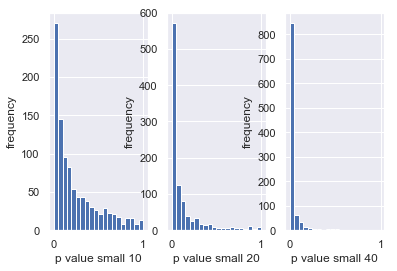

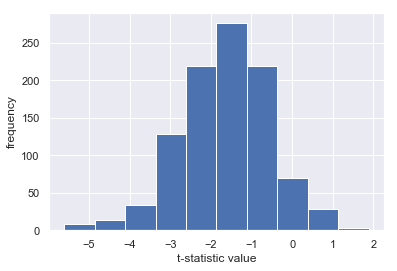

In [79]:
p_val_10 = np.empty(1000)
p_val_20 = np.empty(1000)
p_val_40 = np.empty(1000)
stat = np.empty(1000)


for i in range(1000):
    # taking random sample from temp data
    small_10 = np.random.choice(temp, 10)
    small_20 = np.random.choice(temp, 20)
    small_40 = np.random.choice(temp, 40)

    #calculating t-statistics using stats module. 
    #Only the first one will show the corresponding t-values.
    stat[i], p_val_10[i] = stats.ttest_1samp(small_10, 98.6)
    _, p_val_20[i] = stats.ttest_1samp(small_20, 98.6)
    _, p_val_40[i] = stats.ttest_1samp(small_40, 98.6)
        
# Plotting the calculated p-values using the simulations.
plt.subplot(1, 3, 1)
plt.hist(p_val_10, bins=20)
plt.xlabel('p value small 10')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(p_val_20, bins=20)
plt.xlabel('p value small 20')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(p_val_40, bins=20)
plt.xlabel('p value small 40')
plt.ylabel('frequency')
plt.show()


plt.hist(stat)
plt.xlabel('t-statistic value')
plt.ylabel('frequency')
plt.show()

When taking small random sample of the human body temperature, we cannot reject the null hypothesis. Most of the t-values lay in the acceptance region. 

Above graphs are created using small sample of the data with 10 temperatures chosen, 20 temperatures and 40 temperature sample chosen. Each bin of the graph represents 5% increase in p value. The first bar on each graph is number of p-values lower than 5%. 

When the size is 10, we get only 25% of all simulations rejecting hypothesis. When the size is 40, about 90% of the samples reject the null hypothesis. 

The graph of the second row is the calculated and tabulated corresponding t-values using sample of 10. The graph is already assymetric, as we can expect it to be.

Question 5
At what temperature should we consider someone's temperature to be "abnormal"? 

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

Question 6
Is there a significant difference between males and females in normal temperature? 
What testing approach did you use and why? 
Write a story with your conclusion in the context of the original problem. 

In [82]:
m = df['temperature'].loc[df['gender']=='M']
f = df['temperature'].loc[df['gender']=='F']

mean_m = np.mean(m)
mean_f = np.mean(f)

print('mean temperature for males is ', mean_m)
print('mean temperature for females is ', mean_f)

mean temperature for males is  98.10461538461537
mean temperature for females is  98.39384615384614


The difference between the male and female mean temperature looks large, about 0.28F.

Test 1: two sample test for mean.

Null hypothesis: male and female mean temperature is equal.
Alt. hypothesis: male and female mean temperature is not equal.

We set the CI level at 95%. If the p-value is less than 0.05 we will reject the null hypothesis.

The corresponding z-value for rejecting the null hypotesis with alpha = 0.05 is -1.96.

In [83]:
diff_mean = mean_m - mean_f

var_m = np.var(m)
size_m = m.count()

var_f = np.var(f)
size_f = f.count()

z_value = diff_mean/(var_m/size_m + var_f/size_f)**0.5
print('z-value is ', z_value)

z-value is  -2.3032202891943516


In [ ]:
The calculated z-value is below the treshhold, so we reject the null hypothesis at the given alpha.


In [88]:
#stats.ttest_ind(m, f,  equal_var=False)

